### Load Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Y\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Load dataset

In [ ]:
news = pd.read_csv("../data/raw_analyst_ratings.csv")

news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### Basic Cleaning

In [ ]:
# Convert date column to datetime
news['date'] = pd.to_datetime(news['date'], errors='coerce')

# Create headline length feature
news['headline_length'] = news['headline'].astype(str).apply(len)

### A. Descriptive Statistics

### 1. Headline Length Statistics

In [5]:
news['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

### 2. Plot headline length distribution

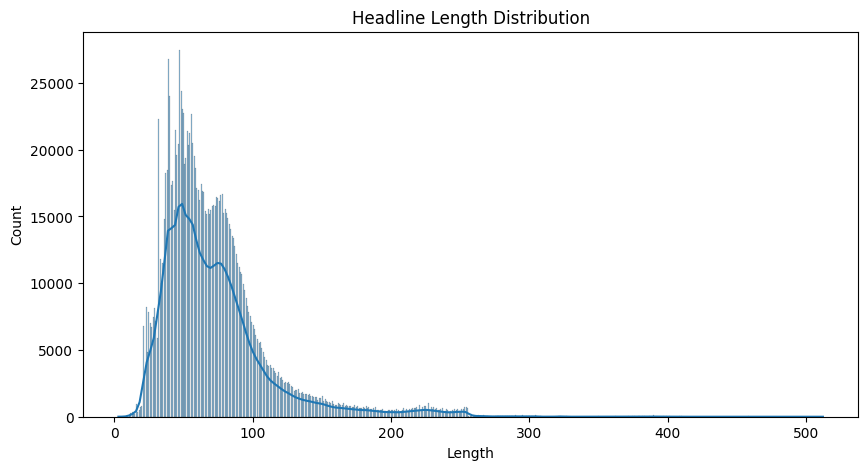

In [6]:
plt.figure(figsize=(10,5))
sns.histplot(news['headline_length'], kde=True)
plt.title("Headline Length Distribution")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()

### B. Publisher Analysis

### 1. Count articles per publisher

In [7]:
publisher_counts = news['publisher'].value_counts()

publisher_counts.head(10)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

### 2. Plot top publishers

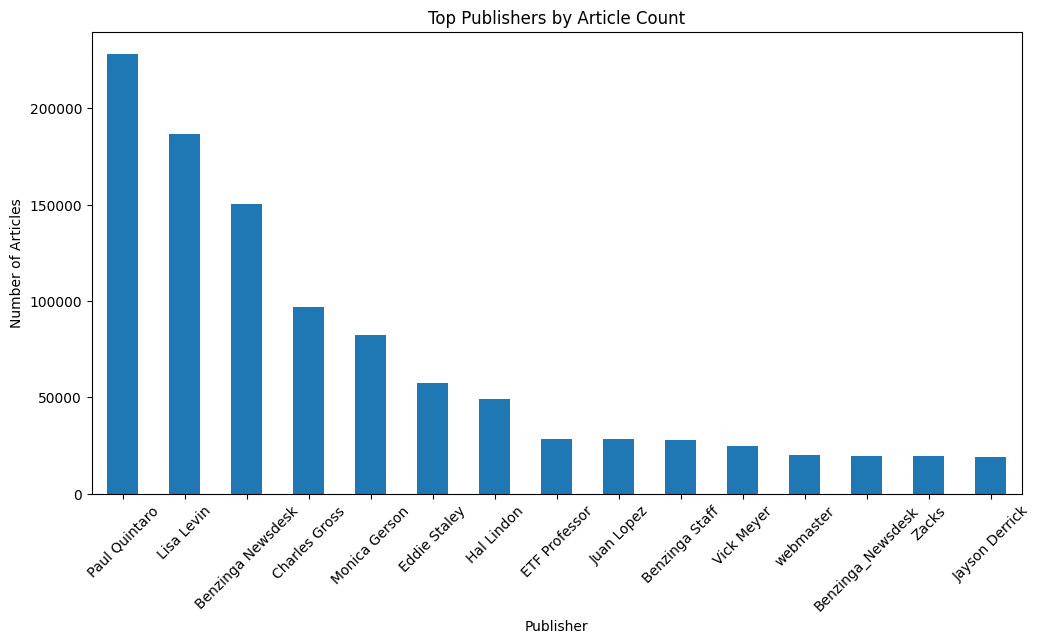

In [8]:
plt.figure(figsize=(12,6))
publisher_counts.head(15).plot(kind='bar')
plt.title("Top Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

### 3. Extract domain names (if publisher is email-like)

In [9]:
def extract_domain(x):
    if isinstance(x, str) and "@" in x:
        return x.split("@")[-1]
    return x

news['publisher_domain'] = news['publisher'].apply(extract_domain)

news['publisher_domain'].value_counts().head(10)

publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

### C. Date / Time Analysis

### 1. Articles per day

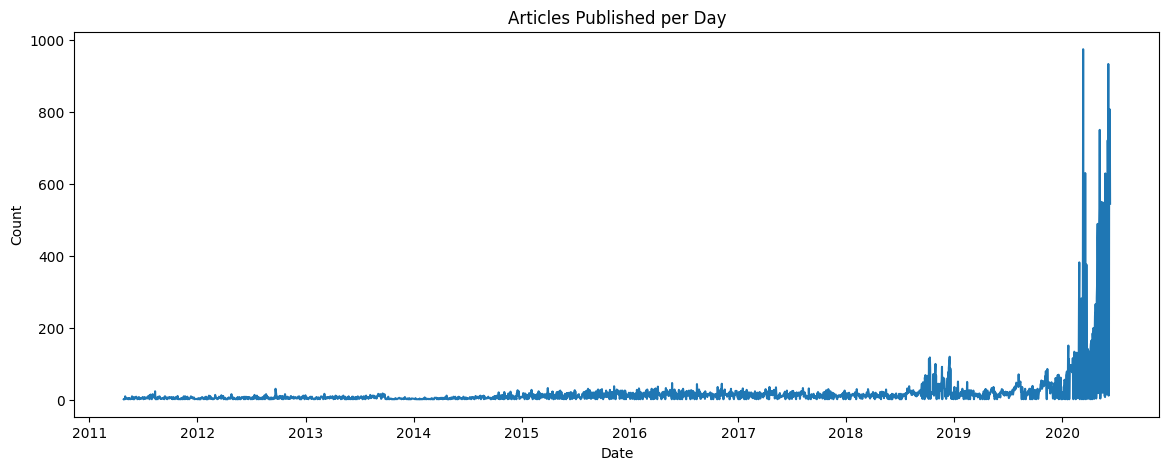

In [10]:
daily = news.groupby(news['date'].dt.date).size()

plt.figure(figsize=(14,5))
daily.plot()
plt.title("Articles Published per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

### 2. Articles by hour of the day

In [ ]:
news['hour'] = news['date'].dt.hour

plt.figure(figsize=(10,5))
sns.countplot(news['hour'])
plt.title("Article Publication Hour Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

### 3. Articles over months

C:\Users\Y\AppData\Local\Temp\ipykernel_4192\497558638.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  news['month'] = news['date'].dt.to_period('M')


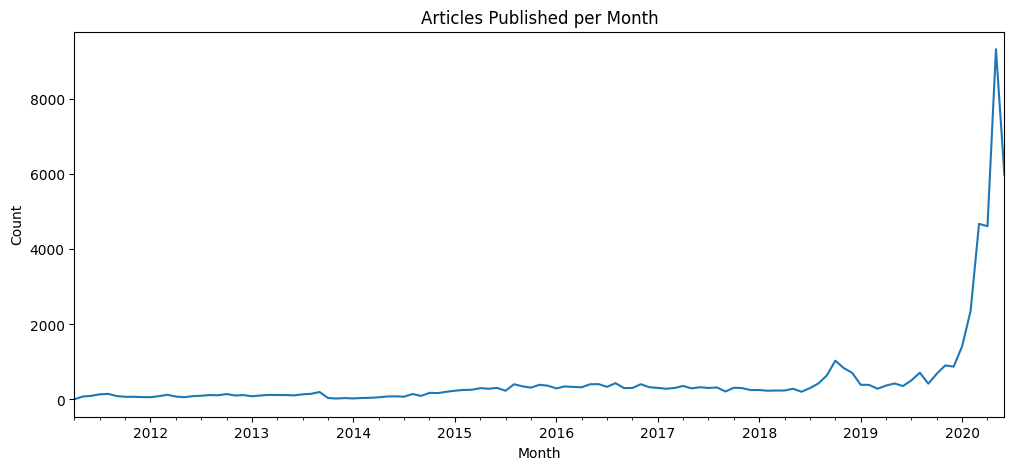

In [11]:

news['month'] = news['date'].dt.to_period('M')

monthly = news.groupby('month').size()

monthly.plot(figsize=(12,5))
plt.title("Articles Published per Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

### D. Keyword / Topic Exploration (Simple NLP)

### 1. Remove stopwords + punctuation

In [12]:
stop = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = [w for w in text.split() if w not in stop]
    return words

news["clean_words"] = news["headline"].apply(clean_text)

### 2. Get top most common words

In [13]:
all_words = [word for row in news["clean_words"] for word in row]

word_freq = Counter(all_words)

word_freq.most_common(20)

[('vs', 162061),
 ('stocks', 161868),
 ('est', 140578),
 ('eps', 128910),
 ('shares', 114181),
 ('reports', 108705),
 ('update', 91680),
 ('market', 90873),
 ('earnings', 87184),
 ('sales', 79524),
 ('top', 78644),
 ('pt', 73043),
 ('announces', 66528),
 ('price', 64231),
 ('buy', 64003),
 ('downgrades', 61942),
 ('trading', 61151),
 ('raises', 57798),
 ('upgrades', 56804),
 ('benzingas', 54907)]

### 3. Plot most common words

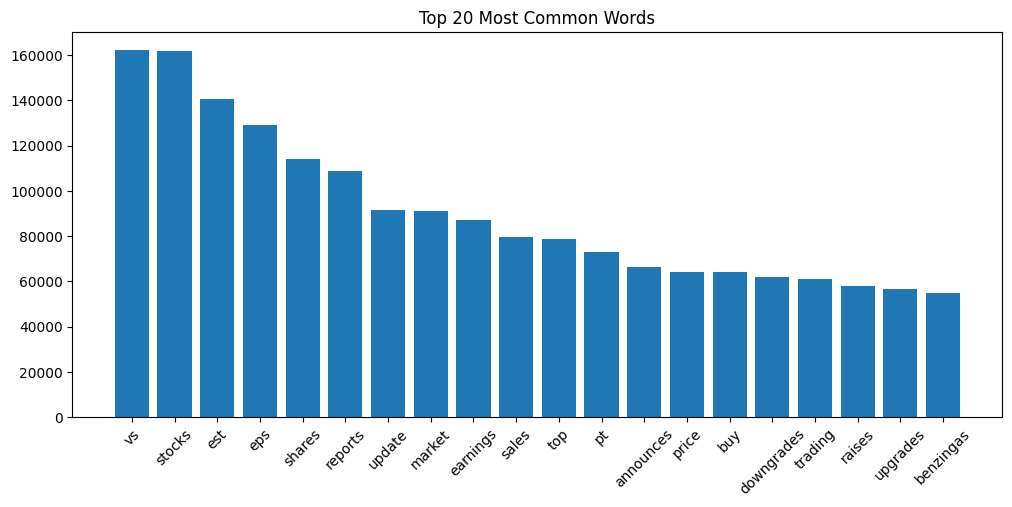

In [14]:
top_words = dict(word_freq.most_common(20))

plt.figure(figsize=(12,5))
plt.bar(top_words.keys(), top_words.values())
plt.title("Top 20 Most Common Words")
plt.xticks(rotation=45)
plt.show()